# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red-M32.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

R - O tipo dos dados está correto e não há dados faltantes por isso eu decidi seguir com a base como está.

In [7]:
#seu código aqui
df.info() #verificando os tipos de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
(df.isnull().sum()/len(df))*100 #verificando a porcentagem de dados nulos e ausentes.

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


A) R - A base possui muitos outliers em algumas colunas porém esses outliers são dados autenticos da base, além disso a comparação entre a media e a mediana está bem próxima uma da outra.

In [15]:
#seu código aqui
df.describe() #verificando a presença de outliers.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [127]:
medianas = df.select_dtypes(include=['number']).median() #verificando a mediana das colunas.

print(medianas)

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '4'),
  Text(4, 0, '8'),
  Text(5, 0, '3')])

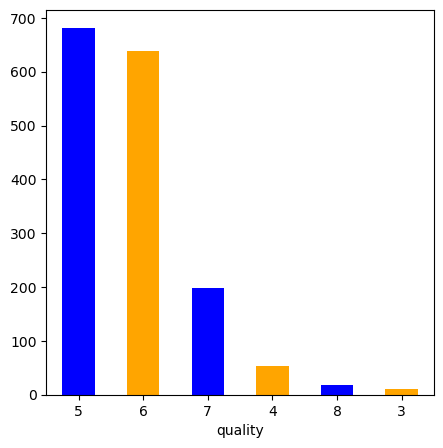

In [5]:
contagem = df['quality'].value_counts() #verificando o balanceamento da coluna 'quality'.
plt.figure(figsize=(5,5))
contagem.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(rotation=0)

B) R - Olhando o gráfico acima podemos ver que a coluna target está muito desbalanceada porém eu irei aplicar o random forest ao dados como estão para verificar os resultados.

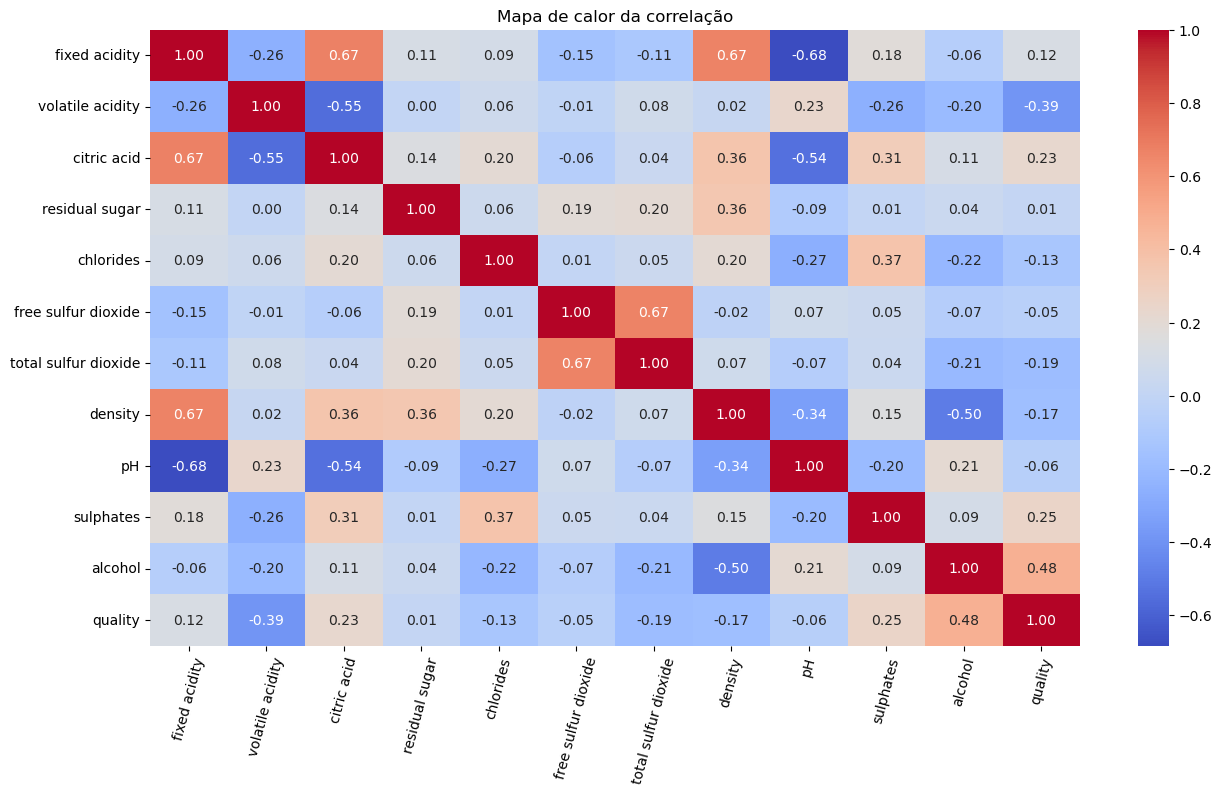

In [53]:
matrix = df.corr()                 #criando um mapa de calor para a correlação das variaveis.
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Mapa de calor da correlação')
plt.xticks(rotation=75)
plt.show()

C) R - As variaveis que apresentam a maior correlação com a target são acidez volátil com uma correlação negativa de -0.39 e o alcool com uma correlação postiva de 0.48

In [8]:
variaveis_correlacionadas = ['alcohol', 'quality', 'volatile acidity']    #criando um novo dataframe com as variaveis de maior correlação com a target
df_correlacao = df[variaveis_correlacionadas].copy()


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [10]:
#seu código aqui
x = df_correlacao.drop('quality', axis=1)
y = df_correlacao['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
x_train.shape

(1279, 2)

In [64]:
x_test.shape

(320, 2)

In [66]:
y_train.shape

(1279,)

In [68]:
y_test.shape

(320,)

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [12]:
#seu código aqui
vinhos_rf = RandomForestClassifier(random_state=42) #iniciando o random forest.

vinhos_rf.fit(x_train, y_train)                     #treinando o modelo.

RandomForestClassifier(random_state=42)

In [14]:
previsao = vinhos_rf.predict(x_test) #fazendo as previsões na base de teste.

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


#respostas

A) R - As métricas de precisão e recall tiveram uma pontuação de 0, isso porque nenhuma amostra foi prevista para uma determinada classe.

B) R - Sim, o modelo não está conseguindo prever corretamente os dados e isso se deve ao desbalanceamento das classes na base.

In [16]:
#seu código aqui
relatorio = classification_report(y_test, previsao, zero_division=0)
print(relatorio)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.57      0.40      0.47        10
           5       0.65      0.71      0.68       130
           6       0.55      0.51      0.53       132
           7       0.41      0.43      0.42        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.36      0.34      0.35       320
weighted avg       0.56      0.57      0.56       320



In [18]:
from imblearn.over_sampling import SMOTE #balanceando a base de treino.

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)
print(y_train_balanced.value_counts())

quality
6    551
5    551
4    551
7    551
8    551
3    551
Name: count, dtype: int64


# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [20]:
#seu código aqui
#criando a grade com os hyperparametros.
grid = {
    'n_estimators' : [50, 100, 200, 300],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth' : [None, 10, 20, 30, 40],
    'min_samples_split' : [10, 15, 20],
    'min_samples_leaf': [10, 15, 20],
    'class_weight': [None, 'balanced'],
    'bootstrap': [True, False] }

model = RandomForestClassifier(random_state=42)
random_sc = RandomizedSearchCV(estimator=model, param_distributions=grid, n_iter=300, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='f1_weighted') #configurando o Randomized.

random_sc.fit(x_train_balanced, y_train_balanced) #executando o Randomized.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 15, 20],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [22]:
best_params = random_sc.best_params_ #obtendo as melhores combinações de hyperparametros no Randomized.
print(best_params)

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}


In [24]:
best_randomforest = random_sc.best_estimator_ #aplicando as melhores combinações de hyperparametros no modelo.

In [26]:
melhor_previsao = best_randomforest.predict(x_test)               #fazendo as previsões com os melhores hyperparametros.
melhor_relatorio = classification_report(y_test, melhor_previsao, zero_division=0) #gerando o relatorio de métricas.
print(melhor_relatorio)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.18      0.60      0.28        10
           5       0.67      0.65      0.66       130
           6       0.55      0.29      0.38       132
           7       0.36      0.48      0.41        42
           8       0.08      0.40      0.14         5

    accuracy                           0.47       320
   macro avg       0.31      0.40      0.31       320
weighted avg       0.55      0.47      0.49       320




C) R - Nos resultados do modelo com o gridsearch, ele teve um redução no F1-Score na previsão 4,5,6 e 7, somente o 8 teve uma leve melhora no resultado e a acuracia do modelo também foi reduzida.


D) R - Depois de fazer diversas alterações no grid, aumentar o numero de interações e testar o modelo com e sem balanceamento, eu conclui, ao comparar os 2 resultados, que nesse dataframe em especifico o modelo obteve uma performace melhor no treinamento sem o tunning, eliminando a necessidade de uma configuração ainda melhor.

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

R - Na minha opinião, técnicas como tuning de hiperparâmetros, feature engineering, balanceamento, variancia de árvore e combinação da árvore com outros modelos estatísticos são alguns dos métodos que podem melhorar as previsões do modelo